<div style="text-align: center;">
    <h1><b>Practical Work 2 : Comparing one-step explicit schemes</b></h1>
</div>

*Authored in 2025 for educational purpose by S. Cardonna, Q. Richard, V. Lleras & P. Azerad. If you identify any issues or have suggestions for improvement, feel free to contact me.*  
  
**Introduction**  
For this second practical work, we first remind some classical one-step schemes. We then implement them and compare them, especially with convergence tests, as it has been done in the previous practical work.


<div style="text-align: center;">
    <h2><b>Part 1 - Main explicit one-step schemes</b></h2>
</div>

**Euler scheme**
$$
y_1 = y_0 + h \, f(t_0, y_0)
$$

**Midpoint scheme**

$$
u = y_0 + \frac{h}{2} \, f(t_0, y_0)
$$

$$
y_1 = y_0 + h \, f\left(t_0 + \frac{h}{2}, u\right)
$$

**Heun scheme**

$$
u_2 = y_0 + \frac{h}{3} \, f(t_0, y_0)
$$

$$
u_3 = y_0 + \frac{2h}{3} \, f\left(t_0 + \frac{h}{3}, u_2\right)
$$

$$
y_1 = y_0 + h \left(\frac{1}{4} f(t_0, y_0) + \frac{3}{4} f\left(t_0 + \frac{2h}{3}, u_3\right)\right)
$$

**Runge-Kutta 4 scheme**

$$
u_2 = y_0 + \frac{h}{2} \, f(t_0, y_0)
$$

$$
u_3 = y_0 + \frac{h}{2} \, f\left(t_0 + \frac{h}{2}, u_2\right)
$$

$$
u_4 = y_0 + h \, f\left(t_0 + \frac{h}{2}, u_3\right)
$$

$$
y_1 = y_0 + h \left(\frac{1}{6} f(t_0, y_0) + \frac{2}{6} f\left(t_0 + \frac{h}{2}, u_2\right) + \frac{2}{6} f\left(t_0 + \frac{h}{2}, u_3\right) + \frac{1}{6} f(t_0 + h, u_4)\right)
$$

<div style="text-align: center;">
    <h2><b>Part 2 - Numerical comparison of various schemes</b></h2>
</div>

Let us now use the code we wrote the previous time, and add midpoint, Heun and RK4 schemes. This will be useful to check during convergence test which test is the most efficient for solving this kind of equations.

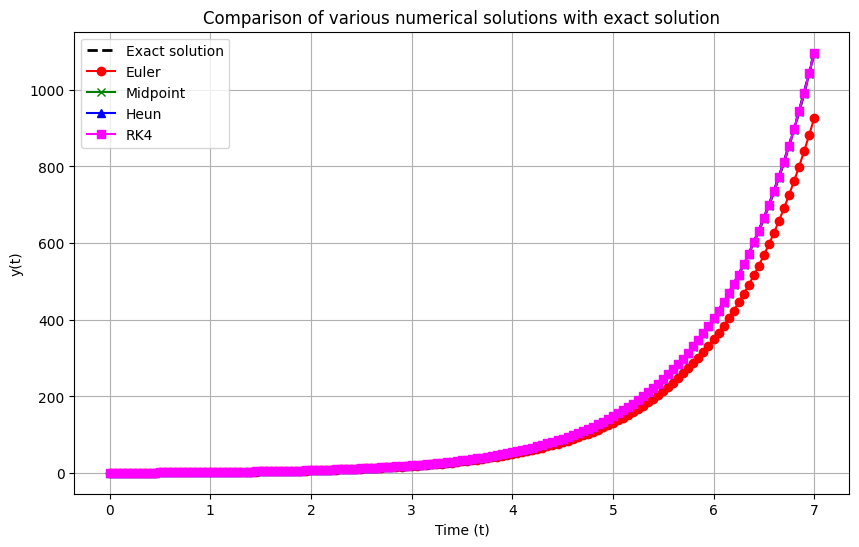

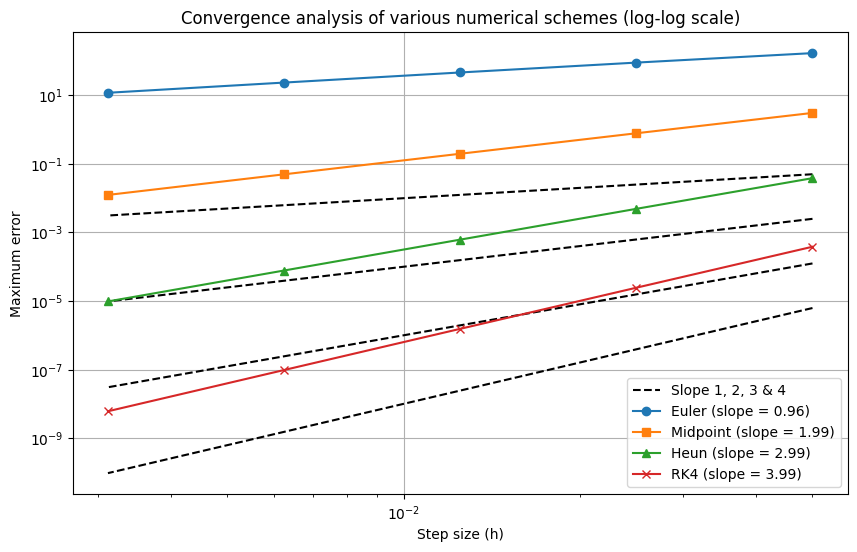

*** ERRORS FOR h = 0.003125 ***
Euler: 1.19044e+01
Midpoint: 1.24649e-02
Heun: 9.73672e-06
RK4: 6.08020e-09


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0
    for j in range(len(t_vals) - 1):
        num_vals[j + 1] = num_vals[j] + h * f(t_vals[j], num_vals[j])
    return t_vals, num_vals

def midpoint_method(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0
    for j in range(len(t_vals) - 1):
        u = num_vals[j] + (h / 2) * f(t_vals[j], num_vals[j])
        num_vals[j + 1] = num_vals[j] + h * f(t_vals[j] + h / 2, u)
    return t_vals, num_vals

def heun_method(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0
    for j in range(len(t_vals) - 1):
        u2 = num_vals[j] + (h / 3) * f(t_vals[j], num_vals[j])
        u3 = num_vals[j] + (2 * h / 3) * f(t_vals[j] + h / 3, u2)
        num_vals[j + 1] = num_vals[j] + h * (1 / 4 * f(t_vals[j], num_vals[j]) + 3 / 4 * f(t_vals[j] + 2 * h / 3, u3))
    return t_vals, num_vals

def rk4_method(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0
    for j in range(len(t_vals) - 1):
        k1 = f(t_vals[j], num_vals[j])
        k2 = f(t_vals[j] + h / 2, num_vals[j] + h / 2 * k1)
        k3 = f(t_vals[j] + h / 2, num_vals[j] + h / 2 * k2)
        k4 = f(t_vals[j] + h, num_vals[j] + h * k3)
        num_vals[j + 1] = num_vals[j] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 7
y0 = 1
h = 5e-2

# Define the ODE y' = y
f = lambda t, y: y

# Exact solution
def exact_solution(t):
    return np.exp(t)

# Compute numerical solutions
t_vals = np.arange(t0, t_final + h, h)
t_vals, euler_vals = euler_method(f, t0, y0, t_final, h)
t_vals, midpoint_vals = midpoint_method(f, t0, y0, t_final, h)
t_vals, heun_vals = heun_method(f, t0, y0, t_final, h)
t_vals, rk4_vals = rk4_method(f, t0, y0, t_final, h)


# Plot numerical solutions and exact solution
plt.figure(figsize=(10, 6))
plt.plot(t_vals, exact_solution(t_vals), '--', label="Exact solution", color="black", linewidth=2)
plt.plot(t_vals, euler_vals, 'o-', label="Euler", color="red")
plt.plot(t_vals, midpoint_vals, 'x-', label="Midpoint", color="green")
plt.plot(t_vals, heun_vals, '^-', label="Heun", color="blue")
plt.plot(t_vals, rk4_vals, 's-', label="RK4", color="magenta")

plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Comparison of various numerical solutions with exact solution")
plt.legend()
plt.grid()
plt.show()

# Error analysis
h_values = [h, h/2, h/4, h/8, h/16]
errors_euler, errors_midpoint, errors_heun, errors_rk4 = [], [], [], []

for h_val in h_values:
    t_vals = np.arange(t0, t_final + h_val, h_val)
    exact_vals = exact_solution(t_vals)
    
    _, euler_vals = euler_method(f, t0, y0, t_final, h_val)
    _, midpoint_vals = midpoint_method(f, t0, y0, t_final, h_val)
    _, heun_vals = heun_method(f, t0, y0, t_final, h_val)
    _, rk4_vals = rk4_method(f, t0, y0, t_final, h_val)
    
    errors_euler.append(np.max(np.abs(euler_vals - exact_vals)))
    errors_midpoint.append(np.max(np.abs(midpoint_vals - exact_vals)))
    errors_heun.append(np.max(np.abs(heun_vals - exact_vals)))
    errors_rk4.append(np.max(np.abs(rk4_vals - exact_vals)))

# Plot errors
plt.figure(figsize=(10, 6))
plt.loglog(h_values, [h**1 for h in h_values], 'k--', label='Slope 1, 2, 3 & 4')
plt.loglog(h_values, [h**2 for h in h_values], 'k--')
plt.loglog(h_values, [h**3 for h in h_values], 'k--')
plt.loglog(h_values, [h**4 for h in h_values], 'k--')

slope_euler = np.polyfit(np.log(h_values), np.log(errors_euler), 1)
slope_midpoint = np.polyfit(np.log(h_values), np.log(errors_midpoint), 1)
slope_heun = np.polyfit(np.log(h_values), np.log(errors_heun), 1)
slope_rk4 = np.polyfit(np.log(h_values), np.log(errors_rk4), 1)

plt.loglog(h_values, errors_euler, 'o-', label='Euler (slope = {:.2f})'.format(slope_euler[0]))
plt.loglog(h_values, errors_midpoint, 's-', label='Midpoint (slope = {:.2f})'.format(slope_midpoint[0]))
plt.loglog(h_values, errors_heun, '^-', label="Heun (slope = {:.2f})".format(slope_heun[0]))
plt.loglog(h_values, errors_rk4, 'x-', label='RK4 (slope = {:.2f})'.format(slope_rk4[0]))
plt.xlabel("Step size (h)")
plt.ylabel("Maximum error")
plt.title("Convergence analysis of various numerical schemes (log-log scale)")
plt.legend()
plt.grid()
plt.show()

# Print errors for the smallest step size
print(f"*** ERRORS FOR h = {h_values[-1]} ***")
print(f"Euler: {errors_euler[-1]:.5e}")
print(f"Midpoint: {errors_midpoint[-1]:.5e}")
print(f"Heun: {errors_heun[-1]:.5e}")
print(f"RK4: {errors_rk4[-1]:.5e}")


Thanks to our convergence analysis, we can numerically verify that Euler's method is of order 1, the Midpoint scheme is of order 2, Heun's method is of order 3, and the Runge-Kutta method is of order 4 (the theoretical proofs being studied in tutorial classes).